<H2>Task 1 - Free Apps from Google Play</H2>

 <p>Predicting which apps cost money and which are free?</p>

<p>The data used in this task is a modified version of that found on <a href="https://www.kaggle.com/gauthamp10/google-playstore-apps">Kaggle</a>.</p>

<p>Have a look at the files <code>Playstore_AppNames.txt</code> and <code>Playstore_data.csv</code>, which contain information for approximately four thousand apps available from the Google Play Store. Data for each app includes the average rating of users, number of reviews, number of verified installs, size of the app, date of last update, minimum Android version required to run the app, the current version of the app, and whether the app is free or costs money. In this project I train an SVM to predict whether an app is free (0) or costs money (1), as indicated in the final column of the file. As always, I will split the data appropriately into training and testing. Also, I'll evaluate the accuracy of the SVM when different values are used for parameters <code>C</code> and <code>gamma</code>. A na&iuml;ve classifier should achieve an accuracy of about 50%, since approximately half of the apps are free and half cost money.</p>

In [1]:
# Read in data from file Playstore_data.csv.
# Store data examples in numpy array X and classes in numpy array y.
# Split data into training data and testing data.
# Create a support vector classifier, train it on the training data, 
# and test it on the testing data.
# Evaluate the accuracy of the SVM when different values are used for parameters C and gamma.

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform, uniform
from sklearn.model_selection import cross_val_score


# Step 1: Read in data from Playstore_data.csv
data = pd.read_csv('Playstore_data.csv')

# Step 2: Prepare data and split into (X) and (y)
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Step 3: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Scale the features and create a support vector classifier, train it on the training data
svm_clf = make_pipeline(StandardScaler(), SVC(random_state=42))
cross_val_score(svm_clf, X_train, y_train).mean()

# Step 5: Evaluate the accuracy of the SVM when different values are used for parameters C and gamma.
param_distrib = {
    "svc__gamma": loguniform(0.001, 0.1),
    "svc__C": uniform(1, 1000)
}
rnd_search_cv = RandomizedSearchCV(svm_clf, param_distrib,
                                   n_iter=100, cv=3, random_state=42)
rnd_search_cv.fit(X_train, y_train)
rnd_search_cv.best_estimator_





Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc',
                 SVC(C=901.4180571633304, gamma=0.01845877663478864,
                     random_state=42))])

In [2]:
# Model Accuracy
print('Model Accuray: ', round((rnd_search_cv.best_score_)*100, 0), '%')

Model Accuray:  72.0 %


In [3]:
# Test this model on the test set
print('Accuray for test data: ', round((rnd_search_cv.score(X_test, y_test))*100, 0), '%')

Accuray for test data:  73.0 %


Accuray for test data:  73.0 %, C=901.4180571633304, gamma=0.01845877663478864

<H2>Task 2 - Choosing Clustering Parameter <em>k</em></H2>

<P>The file <code>data1.csv</code> contains 500 data points with 30 features. 30-dimensional data is not easy to plot and visualize. Below, I've written the code to read in the data in <code>data1.csv</code> and have executed <a href="http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html"><code>sklearn.cluster.KMeans</code></a> clustering on the data using 10 different values for <em>k</em>: 1,2,3,4,5,6,7,8,9,10. For each of the 10 clusterings, I've kept track of the cost of the clustering, which can be found in the <code>KMeans</code> attribute <code>inertia&#95;</code>, e.g., if you name your <code>KMeans</code> clustering object <code>clustering</code> then the cost after execution would be <code>clustering.inertia&#95;</code>. Finally, I've created an elbow plot showing how the cost of the clustering changes as <em>k</em> varies.</P>

C:\Users\STSC\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


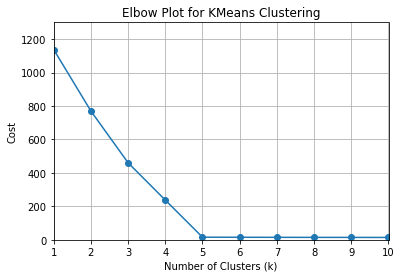

In [12]:
# Read in data from CSV file data1.csv.
# Run KMeans with different values of k, i.e., k as (1,2,3,4,5,6,7,8,9,10).
# Keep track of the "cost" of each clustering.
# Create an elbow plot showing the cost of a clustering (y-axis) as a function of k (x-axis).

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


# Step 1: Read in data from CSV file data1.csv.
data = pd.read_csv("data1.csv")

# Convert data to numpy array
X = data.values

# Step 2: Run KMeans with different values of k and keep track of the cost of each clustering.
k_values = range(1, 11)
costs = []  # List to store the cost for each value of k

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    costs.append(kmeans.inertia_)
    


# Step 3: Create an elbow plot showing the cost of a clustering (y-axis) as a function of k (x-axis).
plt.plot(k_values, costs, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Cost')
plt.title('Elbow Plot for KMeans Clustering')
plt.axis([1, 8.5, 0, 1300])



plt.xticks(k_values)
plt.grid(True)
plt.show()


The elbow point is 5.